In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Coustomer Segmentation.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
df=df.dropna()
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.describe()

# we can see that quantuity has negative values

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
for i in df.columns:
    print(i , '=' , len(df[i].unique()))

InvoiceNo = 22190
StockCode = 3684
Description = 3896
Quantity = 436
InvoiceDate = 20460
UnitPrice = 620
CustomerID = 4372
Country = 37


In [10]:
df=df.drop(df[df['Quantity']<0].index)

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
# adding a column named amount spent
df['AmountSpent']=df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
df['InvDay']=df['InvoiceDate'].dt.date
df['InvTime']=df['InvoiceDate'].dt.time
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,InvDay,InvTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


# EDA

In [15]:
# Top 5 Customers with the highest no of orders

tf=df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
tf.sort_values(by='InvoiceNo', ascending=False).iloc[:5]

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


In [16]:
# Highest money spent by customers
hm=df[['CustomerID','Country','AmountSpent']]
hm.sort_values(by='AmountSpent', ascending=False).iloc[:5]

,CustomerID,Country,AmountSpent
540421,16446.0,United Kingdom,168469.60
61619,12346.0,United Kingdom,77183.60
222680,15098.0,United Kingdom,38970.00
173382,16029.0,United Kingdom,8142.75
348325,17450.0,United Kingdom,7144.72


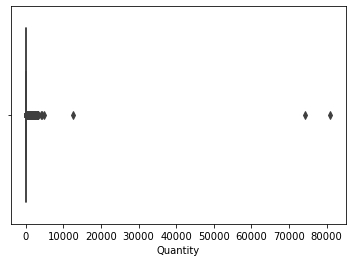

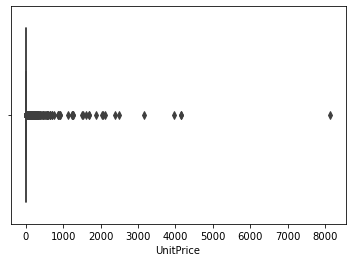

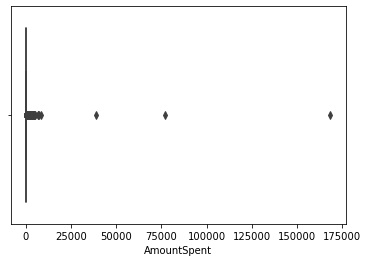

In [17]:
# outliers
for i in df[['Quantity','UnitPrice','AmountSpent']] :
    sns.boxplot(df[i])
    plt.show()

In [18]:
cols = ['Quantity','UnitPrice','AmountSpent'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='AmountSpent'>

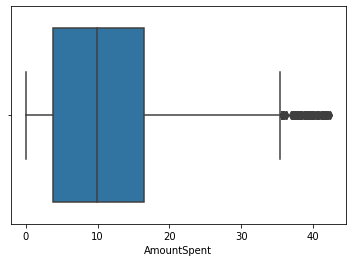

In [19]:
sns.boxplot(df['AmountSpent'])

In [20]:
# Machine learning
df=df.drop(columns=['InvoiceNo','StockCode','Description','InvoiceDate'])


In [21]:
df=df.drop(columns=['CustomerID','InvDay','InvTime',])

In [22]:
# convert amont spent to int
df['AmountSpent']=df['AmountSpent'].astype('int64')

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['Country']=le.fit_transform(df['Country'])

In [25]:
df.head()

,Quantity,UnitPrice,Country,AmountSpent
0,6,2.55,35,15
1,6,3.39,35,20
2,8,2.75,35,22
3,6,3.39,35,20
4,6,3.39,35,20


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(4159, 4)

In [28]:
X = df.iloc[:,[2,3]].values

In [29]:
X

array([[35, 15],
       [35, 20],
       [35, 22],
       ...,
       [35, 32],
       [24, 22],
       [ 3, 14]], dtype=int64)

In [30]:
from sklearn.cluster import KMeans

In [31]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)


[1036580.5188747302, 572698.6302677296, 342663.5659412555, 237123.13005759378, 188856.65451545853, 152636.5432152992, 130504.27391920725, 114671.7438783271, 101465.37669822932, 91649.88890245551]


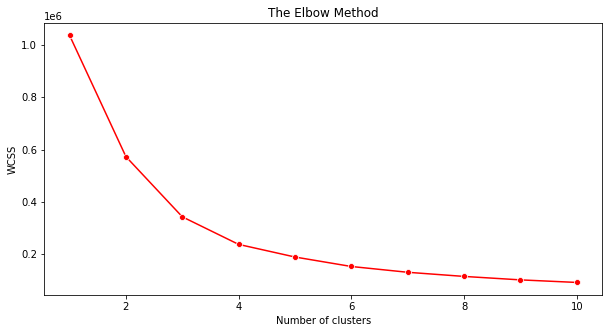

In [32]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)

In [34]:
y_means

array([2, 1, 1, ..., 1, 1, 0])

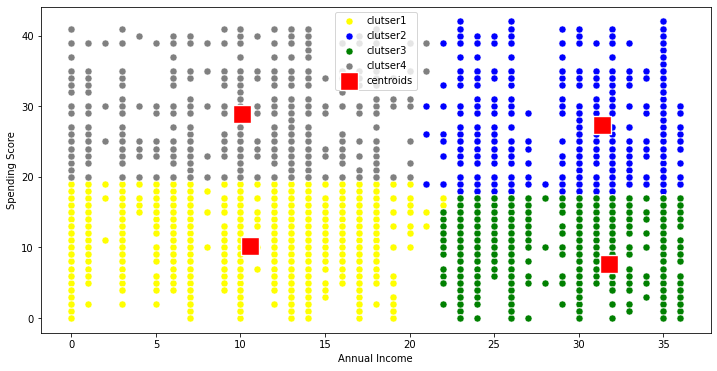

In [35]:
#visualisuing the clusters
plt.figure(figsize=(12,6))

sns.scatterplot(data = X, x = X[y_means==0,0],y = X[y_means==0,1], color='yellow', label='clutser1',s=50)
sns.scatterplot(data = X, x = X[y_means==1,0],y = X[y_means==1,1], color='blue', label='clutser2',s=50)
sns.scatterplot(data = X, x = X[y_means==2,0],y = X[y_means==2,1], color='green', label='clutser3',s=50)
sns.scatterplot(data = X, x = X[y_means==3,0],y = X[y_means==3,1], color='grey', label='clutser4',s=50)
# sns.scatterplot(data = X, x = X[y_means==4,0],y = X[y_means==4,1], color='orange', label='clutser5',s=50)

sns.scatterplot(data=X,x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color='red',label='centroids', s=300, marker=',')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [36]:
from sklearn.metrics import silhouette_score 
silhouette_score(X, kmeans.labels_ , metric='euclidean')

0.46382473340599645

In [37]:
from scipy.cluster import hierarchy

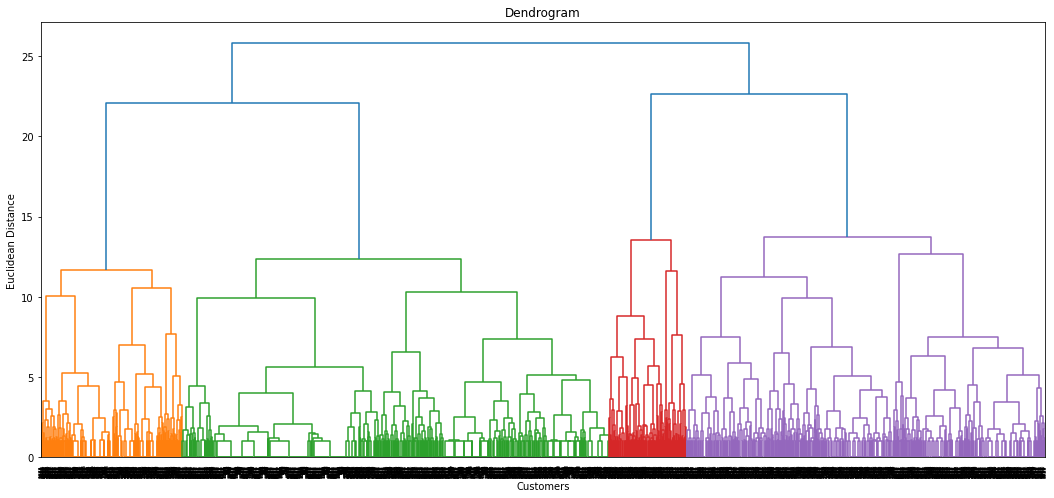

In [38]:
plt.figure(figsize=(18,8))

dendrogram = hierarchy.dendrogram(hierarchy.linkage(X,'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(50,color='red')
plt.show()

In [39]:
tuned_clustering = KMeans(n_clusters=5, init='k-means++', random_state=0)

label = tuned_clustering.fit_predict(X)

In [40]:
label

array([4, 4, 4, ..., 2, 4, 0])

In [41]:
silhouette_score(X, tuned_clustering.labels_, metric='euclidean')

0.43256902901669136

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
clustering_model = AgglomerativeClustering(n_clusters=4,affinity='euclidean')

In [56]:
clustering_model.fit(X)

AgglomerativeClustering(n_clusters=4)

In [57]:
clustering_prediction = clustering_model.fit_predict(X)
clustering_prediction

array([2, 0, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
silhouette_score(X, clustering_prediction, metric='euclidean')

0.4571010238295766

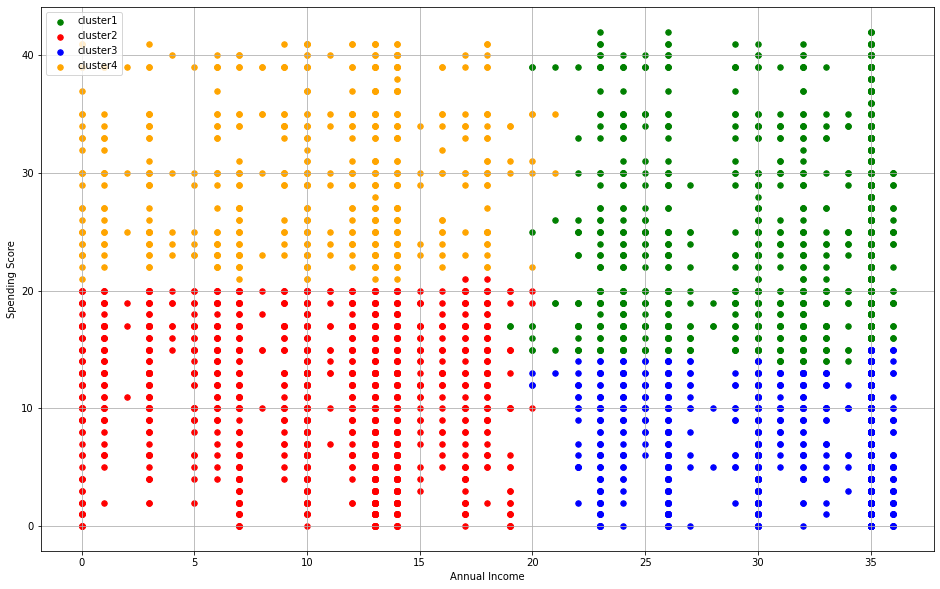

In [59]:
plt.figure(figsize=(16,10))
plt.scatter(X[clustering_prediction==0,0],
            X[clustering_prediction==0,1], s=30, c='green',
           label='cluster1')


plt.scatter(X[clustering_prediction==1,0],
            X[clustering_prediction==1,1], s=30, 
            c='red',label='cluster2')

plt.scatter(X[clustering_prediction==2,0], 
            X[clustering_prediction==2,1], s=30, 
            c='blue',label='cluster3')

plt.scatter(X[clustering_prediction==3,0], 
            X[clustering_prediction==3,1], s=30, 
            c='orange',label='cluster4')

# plt.scatter(X[clustering_prediction==4,0], 
#             X[clustering_prediction==4,1], s=30, 
#             c='yellow',label='cluster5')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [60]:
from sklearn.cluster import DBSCAN
clustering_model = DBSCAN(eps=9, min_samples=4)

In [61]:
clustering_model.fit(X)

DBSCAN(eps=9, min_samples=4)

In [62]:
predict_labels = clustering_model.labels_ 
predict_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

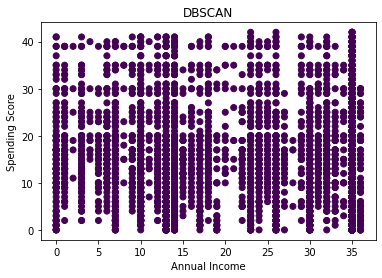

In [63]:
plt.scatter(X[:,0], X[:,1], c=predict_labels)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN')

plt.show()